## Testing code for v_plot

   Cornering Radius  v_curve_rel  v_curve_abs  v_control_rel (C_l=0)
0               5.0     1.026527    23.145360                    1.0
1              10.0     1.055285    33.649449                    1.0
2              15.0     1.086602    42.435040                    1.0
3              20.0     1.120885    50.545711                    1.0
4              25.0     1.158631    58.414891                    1.0
5              30.0     1.200467    66.300884                    1.0
6              35.0     1.247189    74.400311                    1.0
7              40.0     1.299829    82.894265                    1.0
8              45.0     1.359750    91.975851                    1.0
9              50.0     1.428805   101.874682                    1.0


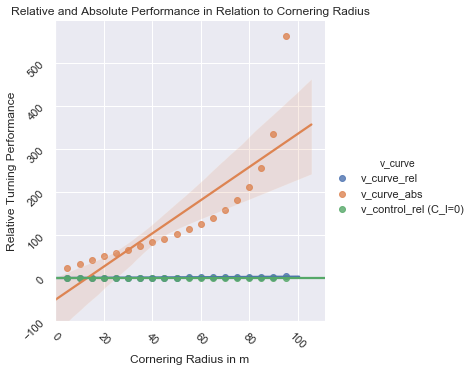

   Drag Coefficient   v_max_ms   v_max_kmh
0               1.0  32.402734  116.649841
1               3.0  22.466801   80.880482
2               5.0  18.949234   68.217241
3               7.0  16.938787   60.979633
4               9.0  15.577609   56.079394
5              11.0  14.569705   52.450937
6              13.0  13.780571   49.610054
7              15.0  13.138665   47.299193
8              17.0  12.601783   45.366420
9              19.0  12.143125   43.715248


Text(0.5, 1, 'Topspeed Function over C_d')

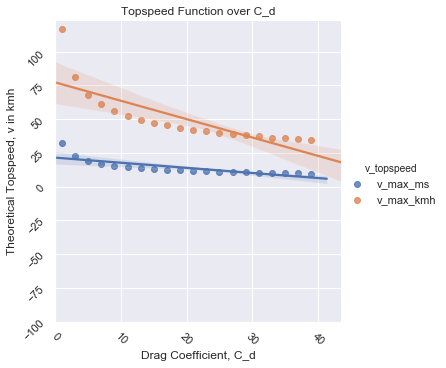

In [39]:

'''Import local modules and plotting packages'''

import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from v_theo_max import v_max
from v_curve_perf import v_curve

import importlib

#importlib.reload(v_theo_max)
#importlib.reload(v_curve_perf)


# Turning Speed Plot

v_abs, v_rel, v_cont, R = v_curve(250, 0.8, 1, 5)
#print(v_rel, v_abs, v_cont, R)

data_curve = np.stack([R, v_rel, v_abs, v_cont], axis=1)
#print(cols)

df_curve = pd.DataFrame(data=data_curve, columns=['Cornering Radius','v_curve_rel', 'v_curve_abs', 'v_control_rel (C_l=0)'], dtype=float)
#df_curve = pd.DataFrame(data={'Cornering Radius': R, 'v_curve_rel': v_rel, 'v_curve_abs': v_abs, 'v_0Cl_rel': v_cont}, columns=['Cornering Radius','v_curve_rel', 'v_curve_abs', 'v_control_rel (C_l=0)'], dtype=float)
# This gives the last col NaNs for some reason
print(df_curve.head(10))

# plotting with matplotlib
# ax = plt.gca()
# df.plot(kind='line',x='Cornering Radius',y='v_curve_rel',ax=ax)
# df.plot(kind='line',x='Cornering Radius',y='v_curve_abs', color='red', ax=ax)
# plt.show()

df_curve = df_curve.melt('Cornering Radius', var_name='v_curve', value_name='Performance')

plot_curve=sns.lmplot(x='Cornering Radius', y='Performance' , hue='v_curve', data= df_curve)

plt.ylim(-100, None)
plt.xlim(0, None)

plt.xticks(rotation=-45)
plt.yticks(rotation=45)

plt.xlabel('Cornering Radius in m')
plt.ylabel('Relative Turning Performance')

#plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.title('Relative and Absolute Performance in Relation to Cornering Radius')

plt.show()


#Topspeed Plot

v_ms, v_kmh, cd = v_max(250, A=12)
#print(v_ms, v_kmh, cd)

data_topspeed = np.stack([cd, v_ms,v_kmh], axis=1)
df_topspeed = pd.DataFrame(data=data_topspeed, columns=['Drag Coefficient','v_max_ms', 'v_max_kmh'], dtype=float)
#df_topspeed = pd.DataFrame({'Drag Coefficient': cd, 'v_max_ms': v_ms, 'v_max:kmh': v_kmh}, columns=['Drag Coefficient','v_max_ms', 'v_max_kmh'], dtype=float)
print(df_topspeed.head(10))

#print(df_topspeed.isnull().sum())
#print(df_curve.isnull().sum())

df_topspeed = df_topspeed.melt('Drag Coefficient', var_name='v_topspeed', value_name='v_max')

plot_topspeed=sns.lmplot(x='Drag Coefficient', y='v_max' , hue='v_topspeed', data= df_topspeed)

plt.ylim(-100, None)
plt.xlim(0, None)

plt.xticks(rotation=-45)
plt.yticks(rotation=45)

plt.xlabel('Drag Coefficient, C_d')
plt.ylabel('Theoretical Topspeed, v in kmh')

plt.title('Topspeed Function over C_d')



## Testing v_plot import and output

   Cornering Radius  v_curve_rel  v_curve_abs  v_control_rel (C_l=0)
0               5.0     1.026527    23.145360                    1.0
1              10.0     1.055285    33.649449                    1.0
2              15.0     1.086602    42.435040                    1.0
3              20.0     1.120885    50.545711                    1.0
4              25.0     1.158631    58.414891                    1.0
5              30.0     1.200467    66.300884                    1.0
6              35.0     1.247189    74.400311                    1.0
7              40.0     1.299829    82.894265                    1.0
8              45.0     1.359750    91.975851                    1.0
9              50.0     1.428805   101.874682                    1.0


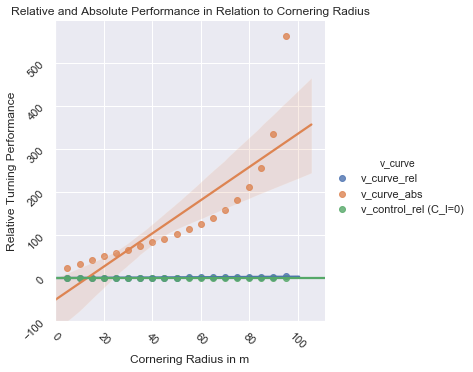

   Drag Coefficient   v_max_ms   v_max_kmh
0               1.0  32.402734  116.649841
1               3.0  22.466801   80.880482
2               5.0  18.949234   68.217241
3               7.0  16.938787   60.979633
4               9.0  15.577609   56.079394
5              11.0  14.569705   52.450937
6              13.0  13.780571   49.610054
7              15.0  13.138665   47.299193
8              17.0  12.601783   45.366420
9              19.0  12.143125   43.715248


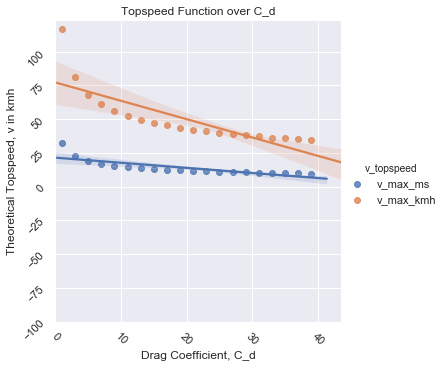

In [41]:
from v_plot import plot_performance

plot_performance()

In [1]:
''' Import Relevant Packages '''
import os, datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

cwd = os.getcwd()
print(cwd)

path_to_tables = '/Tables/'

filenames = {'data1': 'data1',
'data2_excel':'data2',
'data3_excel': 'data3',
'data4_excel': 'data4',
'data_v1_desc_excel': 'DATA_v1_gerade_SeiteParabel_GurneyFlap_AbstandGross',
'data_v2_desc_excel': 'DATA_v2_gerade_SeiteGanz_GurneyFlap_AbstandGross',
'data_v3_desc_excel': 'DATA_v3_gerade_SeiteSchraeg_GurneyFlap_AbstandGross',
'data_v4_desc_excel': 'DATA_v4_gerade_SeiteSchraegCutUnten_GurneyFlap_AbstandGross',
'data_excel_original':'CSV_Example_original',
'data_excel_semik_original':'CSV_Example_Semikolon_original',
'data_excel_semik_aufg':'CSV_Example_Semikolon_aufgefuellt',
'data_1500_csv':'SaveDataToCSV_DataToCSV_01500' }

fullpaths = filenames.copy()

for key in filenames:
    print(key)
    if 'excel' in key.strip().lower():
        fullpaths[key] = cwd+path_to_tables+filenames[key]+'.xlsx'
    elif 'csv' in key.strip().lower():
        fullpaths[key] = cwd+path_to_tables+filenames[key]+'.csv'

print(fullpaths)

dataframes = fullpaths.copy()
for key in fullpaths:
    if 'v' in fullpaths[key][-1]:
        dataframes[key] = pd.read_csv(fullpaths[key]) #ergänze index col, other oarametrs
        a= dataframes[key].head(10)
        b = dataframes[key].describe()
        print(a,b)
    elif 'x' in fullpaths[key][-1]:
        dataframes[key] = pd.read_excel(fullpaths[key])
        a= dataframes[key].head(10)
        b = dataframes[key].describe()
        print(a,b)

print(dataframes)





# I should have dataframes for all tables her now

# Now to output statistical value for last 50 iterations

mod_df = dataframes.copy()

'''for key in dataframes:
    mod_df[key] = dataframes[key].iloc[-50::]
    print(mod_df[key], mod_df.describe())'''


/Users/amitavchrismostafa/Documents/Python/amda-aero
data1
data2_excel
data3_excel
data4_excel
data_v1_desc_excel
data_v2_desc_excel
data_v3_desc_excel
data_v4_desc_excel
data_excel_original
data_excel_semik_original
data_excel_semik_aufg
data_1500_csv
{'data1': 'data1', 'data2_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/data2.xlsx', 'data3_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/data3.xlsx', 'data4_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/data4.xlsx', 'data_v1_desc_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/DATA_v1_gerade_SeiteParabel_GurneyFlap_AbstandGross.xlsx', 'data_v2_desc_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/DATA_v2_gerade_SeiteGanz_GurneyFlap_AbstandGross.xlsx', 'data_v3_desc_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/DATA_v3_gerade_SeiteSchraeg_GurneyFlap_AbstandGross.xlsx', 'data_v4_desc_excel': '/Users/amitavch

AttributeError: 'str' object has no attribute 'iloc'

In [20]:
#h

TypeError: 'dict_keys' object is not subscriptable

In [2]:
''' Import Relevant Packages '''
import os, datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

cwd = os.getcwd()
print(cwd)

path_to_tables = '/Tables/'

filenames = {'data1': 'data1',
'data2_excel':'data2',
'data3_excel': 'data3',
'data4_excel': 'data4',
'data_v1_desc_excel': 'DATA_v1_gerade_SeiteParabel_GurneyFlap_AbstandGross',
'data_v2_desc_excel': 'DATA_v2_gerade_SeiteGanz_GurneyFlap_AbstandGross',
'data_v3_desc_excel': 'DATA_v3_gerade_SeiteSchraeg_GurneyFlap_AbstandGross',
'data_v4_desc_excel': 'DATA_v4_gerade_SeiteSchraegCutUnten_GurneyFlap_AbstandGross',
'data_excel_original':'CSV_Example_original',
'data_excel_semik_original':'CSV_Example_Semikolon_original',
'data_excel_semik_aufg':'CSV_Example_Semikolon_aufgefuellt',
'data_1500_csv':'SaveDataToCSV_DataToCSV_01500' }

fullpaths = filenames.copy()

for key in filenames:
    print(key)
    if 'excel' in key.strip().lower():
        fullpaths[key] = cwd+path_to_tables+filenames[key]+'.xlsx'
    elif 'csv' in key.strip().lower():
        fullpaths[key] = cwd+path_to_tables+filenames[key]+'.csv'

fullpaths

/Users/amitavchrismostafa/Documents/Python/amda-aero
data1
data2_excel
data3_excel
data4_excel
data_v1_desc_excel
data_v2_desc_excel
data_v3_desc_excel
data_v4_desc_excel
data_excel_original
data_excel_semik_original
data_excel_semik_aufg
data_1500_csv


{'data1': 'data1',
 'data2_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/data2.xlsx',
 'data3_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/data3.xlsx',
 'data4_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/data4.xlsx',
 'data_v1_desc_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/DATA_v1_gerade_SeiteParabel_GurneyFlap_AbstandGross.xlsx',
 'data_v2_desc_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/DATA_v2_gerade_SeiteGanz_GurneyFlap_AbstandGross.xlsx',
 'data_v3_desc_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/DATA_v3_gerade_SeiteSchraeg_GurneyFlap_AbstandGross.xlsx',
 'data_v4_desc_excel': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/DATA_v4_gerade_SeiteSchraegCutUnten_GurneyFlap_AbstandGross.xlsx',
 'data_excel_original': '/Users/amitavchrismostafa/Documents/Python/amda-aero/Tables/CSV_Example_original.xlsx',
 'data_excel_semik_or

In [3]:
dataframes = fullpaths.copy()
for key in fullpaths:
    if 'v' in fullpaths[key][-1]:
        dataframes[key] = pd.read_csv(fullpaths[key]) #ergänze index col, other oarametrs
        a= dataframes[key].head(10)
        b = dataframes[key].describe()
        print(a,b)
    elif 'x' in fullpaths[key][-1]:
        dataframes[key] = pd.read_excel(fullpaths[key])
        a= dataframes[key].head(10)
        b = dataframes[key].describe()
        print(a,b)

dataframes

   Iteration  03_Downforce Monitor: 03_Downforce Monitor (N)  \
0        1.0                               14503342139047000   
1        2.0                               14495278172369100   
2        3.0                               14495762740720100   
3        4.0                                 144809166111593   
4        5.0                               14478632230839900   
5        6.0                               14520427522821700   
6        7.0                               14488844051006400   
7        8.0                               14487812403899700   
8        9.0                               14471342890662500   
9       10.0                               14432416597348700   

   03_Downforce_Diffusor Monitor: 03_Downforce_Diffusor Monitor (N)  \
0                                  11103292815867700                  
1                                   1110495466534360                  
2                                  11104845336029800                  
3          

{'data1': 'data1',
 'data2_excel':       Iteration  03_Downforce Monitor: 03_Downforce Monitor (N)  \
 0           1.0                               14503342139047000   
 1           2.0                               14495278172369100   
 2           3.0                               14495762740720100   
 3           4.0                                 144809166111593   
 4           5.0                               14478632230839900   
 ...         ...                                             ...   
 1495     1496.0                               16469858587924300   
 1496     1497.0                                1646986202161160   
 1497     1498.0                               16470540538109400   
 1498     1499.0                               16471146859546400   
 1499     1500.0                               16471675730982300   
 
       03_Downforce_Diffusor Monitor: 03_Downforce_Diffusor Monitor (N)  \
 0                                     11103292815867700                 

In [4]:
mod_df = dataframes.copy()

In [ ]:
mod_df['']